## Dominant Color Extraction for Image Segmentation Using K-Means
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="Dataset/Color_Extraction/example.png" alt="Example" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2

(330, 500, 3)


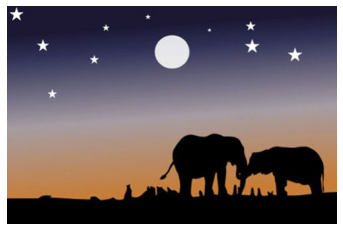

In [2]:
im = cv2.imread('Dataset/Color_Extraction/elephant.jpg')
print(im.shape)
original_shape = im.shape
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_image = im
plt.imshow(im)
plt.axis("off")
plt.show()

In [3]:
# Flatten Each Channel of The Image
all_pixels = im.reshape((-1, 3))
print(all_pixels.shape)

(165000, 3)


In [4]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
print("The RGB Values Of", dominant_colors, "Dominant Colors Are -> \n", centers)

The RGB Values Of 4 Dominant Colors Are -> 
 [[ 98  94 117]
 [174 145 128]
 [  1   0   1]
 [ 37  35  64]]


#### Plot What All Colors Are These !

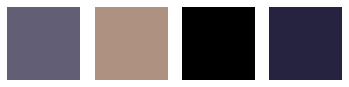

In [6]:
i = 1
plt.figure(0, figsize=(6,4))
colors = []
for each_col in centers:
    plt.subplot(1, 4, i)
    i+=1
    colors.append(each_col)
    # Color Swatch
    cs = np.zeros((100,100,3), dtype='uint8')
    cs[:,:,:] = each_col
    plt.axis("off")
    plt.imshow(cs)
plt.show()

## Segmenting Our Original Image !

In [7]:
new_image = np.zeros((330*500, 3), dtype='uint8')
print(new_image.shape)

(165000, 3)


In [8]:
print(colors)

[array([ 98,  94, 117], dtype=uint8), array([174, 145, 128], dtype=uint8), array([1, 0, 1], dtype=uint8), array([37, 35, 64], dtype=uint8)]


In [9]:
labels = km.labels_
print(labels)

[3 3 3 ... 2 2 2]


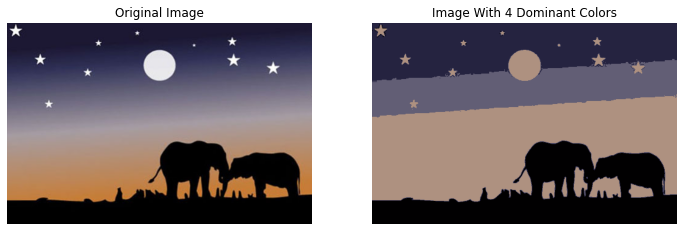

In [10]:
for ix in range(new_image.shape[0]):
    new_image[ix] = colors[labels[ix]]
    
new_image = new_image.reshape((original_shape))
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(new_image)
plt.title("Image With 4 Dominant Colors")
plt.axis("off")
plt.show()

### Experimenting With Different Values of 'K'

In [11]:
def extractAndShow(dominant_colors):
    """ Extract The Given Number Of Colors From The Image And Display Those Colors and Images. """
    print("No. Of Dominant Colors : ", dominant_colors)
    km = KMeans(n_clusters=dominant_colors)
    km.fit(all_pixels)
    centers = km.cluster_centers_
    centers = np.array(centers, dtype='uint8')
    
    # Plot What All Colors Are Extracted
    i = 1
    plt.figure(0, figsize=(10,20))
    colors = []
    for each_col in centers:
        plt.subplot(1, dominant_colors, i)
        i+=1
        colors.append(each_col)
        # Color Swatch
        cs = np.zeros((100,100,3), dtype='uint8')
        cs[:,:,:] = each_col
        plt.axis("off")
        plt.imshow(cs)
    plt.show()
    
    # Making New Image
    new_image = np.zeros((330*500, 3), dtype='uint8')
    labels = km.labels_

    for ix in range(new_image.shape[0]):
        new_image[ix] = colors[labels[ix]]

    new_image = new_image.reshape((original_shape))
    plt.figure(figsize=(12,12))
    plt.subplot(1,2,1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(new_image)
    plt.title("Image With " + str(dominant_colors) + " Dominant Colors")
    plt.axis("off")
    plt.show()
    
    return

No. Of Dominant Colors :  8


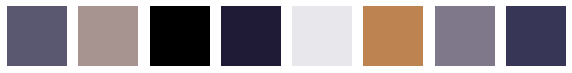

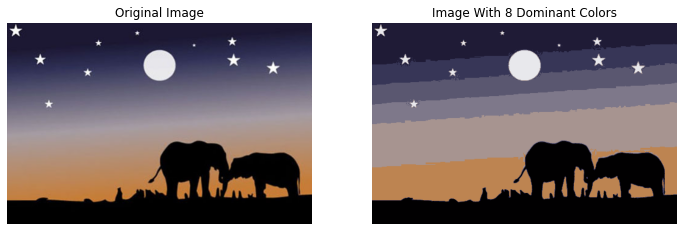

In [12]:
# Number Of Dominant Colors = 8
extractAndShow(dominant_colors=8)

No. Of Dominant Colors :  16


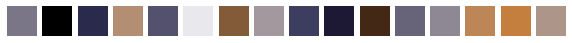

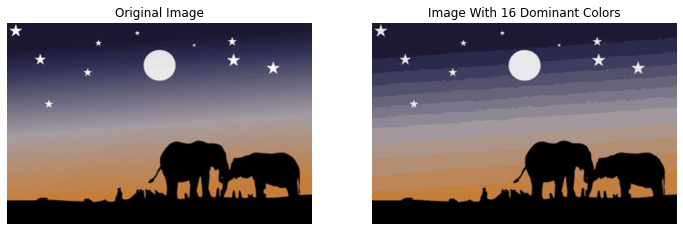

In [13]:
# Number Of Dominant Colors = 16
extractAndShow(dominant_colors=16)

No. Of Dominant Colors :  32


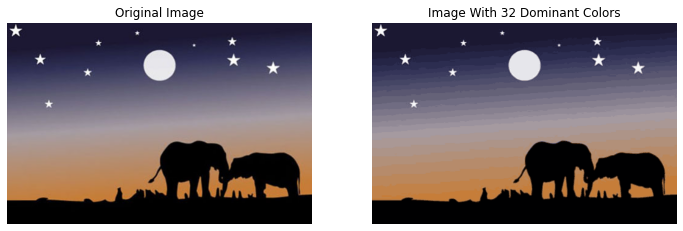

In [14]:
# Number Of Dominant Colors = 32
extractAndShow(dominant_colors=32)

No. Of Dominant Colors :  64


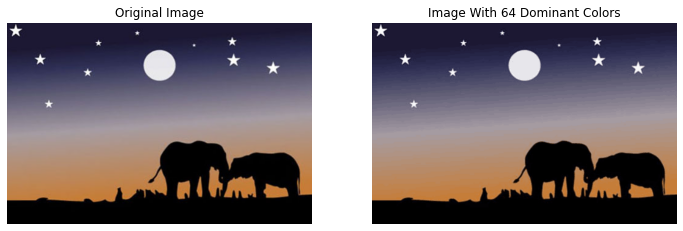

In [15]:
# Number Of Dominant Colors = 64
extractAndShow(dominant_colors=64)